# Fourier Series (SKP)

Code for getting Fourier series (both analytical and numerical) is given here.

- **Functions in `scipy.signal`** (waveforms, wavelets, peak finding)
- **Numerical Case**
- **Symbolic Case**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import simps, quad
import sympy as smp
from sympy import *

Functions in scipy.signal
=====================
To see all the functions, run **scipy.signal?**.

### Waveforms

.. autosummary::
   :toctree: generated/

   1. chirp        -- Frequency swept cosine signal, with several freq functions.
   2. gausspulse   -- Gaussian modulated sinusoid.
   3. max_len_seq  -- Maximum length sequence.
   4. sawtooth     -- Periodic sawtooth.
   5. square       -- Square wave.
   6. sweep_poly   -- Frequency swept cosine signal; freq is arbitrary polynomial.
   7. unit_impulse -- Discrete unit impulse.

### Wavelets

.. autosummary::
   :toctree: generated/

   1. cascade      -- Compute scaling function and wavelet from coefficients.
   2. daub         -- Return low-pass.
   3. morlet       -- Complex Morlet wavelet.
   4. qmf          -- Return quadrature mirror filter from low-pass.
   5. ricker       -- Return ricker wavelet.
   6. morlet2      -- Return Morlet wavelet, compatible with cwt.
   7. cwt          -- Perform continuous wavelet transform.

### Peak finding

.. autosummary::
   :toctree: generated/

   1. argrelmin        -- Calculate the relative minima of data.
   2. argrelmax        -- Calculate the relative maxima of data.
   3. argrelextrema    -- Calculate the relative extrema of data.
   4. find_peaks       -- Find a subset of peaks inside a signal.
   5. find_peaks_cwt   -- Find peaks in a 1-D array with wavelet transformation.
   6. peak_prominences -- Calculate the prominence of each peak in a signal.
   7. peak_widths      -- Calculate the width of each peak in a signal.

# Numrical Case

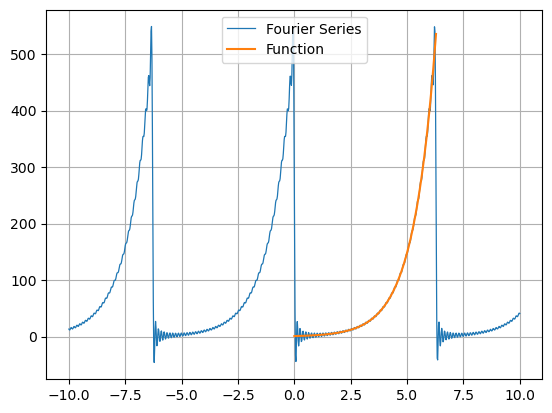

In [2]:
M1, M2 = 0, 2*np.pi          # period of x
x = np.linspace(M1, M2, 1000)
f = lambda x: np.exp(x)   # write the function

a0 = 2/(M2-M1) * simps(f(x), x)
an = lambda n: (2/(M2-M1)) * simps(f(x)*np.cos(n*np.pi*x*2/(M2-M1)), x)
bn = lambda n: (2/(M2-M1)) * simps(f(x)*np.sin(n*np.pi*x*2/(M2-M1)), x)

L1, L2 = -10, 10     # length of the signal
N = 50     # no. of terms in Fourier Series
xp = np.linspace(L1,L2,1000)
S = a0 * 0.5 + sum([an(n)* np.cos(n*np.pi*xp*2/(M2-M1))+ 
                    bn(n)*np.sin(n*np.pi*xp*2/(M2-M1)) for n in range (1,N)])

import matplotlib.pyplot as plt
plt.plot(xp, S,lw=0.9, label='Fourier Series')
plt.plot(x, f(x), label='Function')
plt.legend()
plt.grid()
plt.show()

# Symbolic Case

(1/2 - exp(2*pi)/2)*sin(x)/pi + (2/5 - 2*exp(2*pi)/5)*sin(2*x)/pi + (3/10 - 3*exp(2*pi)/10)*sin(3*x)/pi + (4/17 - 4*exp(2*pi)/17)*sin(4*x)/pi + (5/26 - 5*exp(2*pi)/26)*sin(5*x)/pi + (6/37 - 6*exp(2*pi)/37)*sin(6*x)/pi + (7/50 - 7*exp(2*pi)/50)*sin(7*x)/pi + (8/65 - 8*exp(2*pi)/65)*sin(8*x)/pi + (9/82 - 9*exp(2*pi)/82)*sin(9*x)/pi + (10/101 - 10*exp(2*pi)/101)*sin(10*x)/pi + (11/122 - 11*exp(2*pi)/122)*sin(11*x)/pi + (12/145 - 12*exp(2*pi)/145)*sin(12*x)/pi + (13/170 - 13*exp(2*pi)/170)*sin(13*x)/pi + (14/197 - 14*exp(2*pi)/197)*sin(14*x)/pi + (15/226 - 15*exp(2*pi)/226)*sin(15*x)/pi + (16/257 - 16*exp(2*pi)/257)*sin(16*x)/pi + (17/290 - 17*exp(2*pi)/290)*sin(17*x)/pi + (18/325 - 18*exp(2*pi)/325)*sin(18*x)/pi + (19/362 - 19*exp(2*pi)/362)*sin(19*x)/pi + (-1/2 + exp(2*pi)/2)*cos(x)/pi + (-1/5 + exp(2*pi)/5)*cos(2*x)/pi + (-1/10 + exp(2*pi)/10)*cos(3*x)/pi + (-1/17 + exp(2*pi)/17)*cos(4*x)/pi + (-1/26 + exp(2*pi)/26)*cos(5*x)/pi + (-1/37 + exp(2*pi)/37)*cos(6*x)/pi + (-1/50 + exp(2*pi)/5

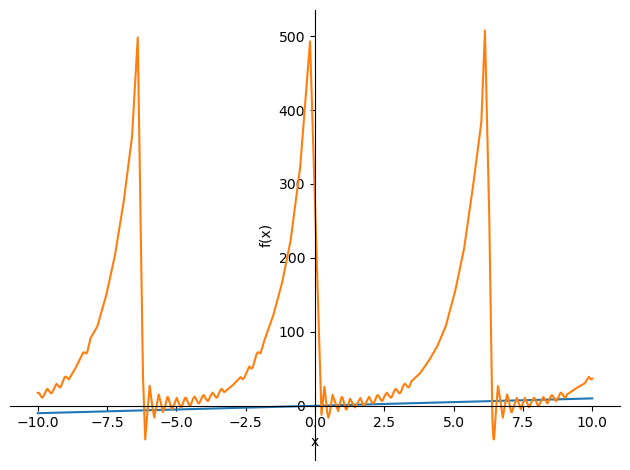

In [3]:
x = smp.symbols('x')
y = smp.exp(x)    # write the symbolic function
S = y.fourier_series([0, 2*smp.pi]).truncate(20)  # period of x, no. of terms
display(S)
smp.plot(x,S)